In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [178]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [33]:
train.shape

(550068, 12)

In [8]:
train.groupby('User_ID').agg({'User_ID':'count'})

,User_ID
User_ID,
1000001,35
1000002,77
1000003,29
1000004,14
1000005,106
...,...
1006036,514
1006037,122
1006038,12


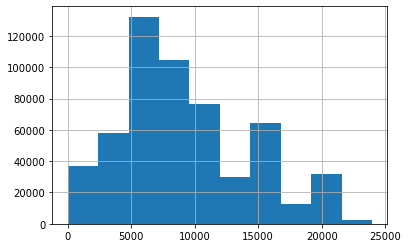

In [9]:
train.Purchase.hist()

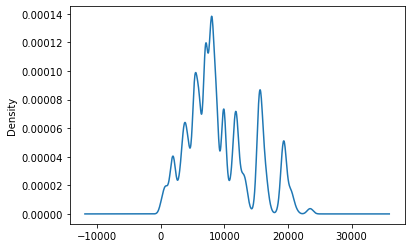

In [12]:
train.Purchase.plot(kind='density')

In [15]:
train.Purchase.skew()

0.6001400037087128

In [16]:
train.Purchase.kurt()

-0.3383775655851702

In [17]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [18]:
target = np.array(train.Purchase)

In [20]:
target = target.reshape((len(target),1))

In [22]:
data_trans = power.fit_transform(target)

In [23]:
data_trans = data_trans.reshape(-1)

In [25]:
data_trans = pd.Series(data_trans)

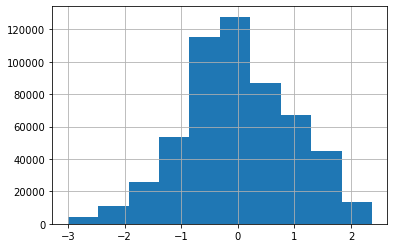

In [26]:
data_trans.hist()

In [27]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [28]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [29]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [31]:
train1 = train.drop('Purchase', axis = 1)
combinedata = pd.concat([train1,test])

In [32]:
combinedata.shape

(783667, 11)

In [34]:
combinedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 71.7+ MB


In [35]:
numericdata = combinedata.select_dtypes(include=np.number)

In [36]:
objectdata = combinedata.select_dtypes(include=np.object)

In [37]:
##Cleaning Object data
objectdata.isnull().sum().sort_values(ascending = False)

Stay_In_Current_City_Years    0
City_Category                 0
Age                           0
Gender                        0
Product_ID                    0
dtype: int64

In [38]:
#No Null Values in Object Data
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
objectdummy = objectdata.apply(le.fit_transform)

In [41]:
objectdummy

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,684,0,0,0,2
1,2406,0,0,0,2
2,868,0,0,0,2
3,844,0,0,0,2
4,2769,1,6,2,4
...,...,...,...,...,...
233594,1118,0,2,1,4
233595,2463,0,2,1,4
233596,315,0,2,1,4
233597,1175,0,4,2,4


In [42]:
##Cleaning Numeric Values
numericdata.isnull().sum().sort_values(ascending = False)

Product_Category_3    545809
Product_Category_2    245982
Product_Category_1         0
Marital_Status             0
Occupation                 0
User_ID                    0
dtype: int64

In [43]:
numericdata.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [45]:
numericdata.Product_Category_3 = numericdata.Product_Category_3.fillna(value=0)

D:\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
numericdata.isnull().sum().sort_values(ascending = False)

Product_Category_2    245982
Product_Category_3         0
Product_Category_1         0
Marital_Status             0
Occupation                 0
User_ID                    0
dtype: int64

In [48]:
from sklearn.impute import SimpleImputer

In [51]:
simple = SimpleImputer(missing_values=np.nan, strategy='median')

In [50]:
numericlabels = numericdata.columns

In [52]:
numericdata = simple.fit_transform(numericdata)

In [53]:
numericdata = pd.DataFrame(numericdata, columns = numericlabels)

In [54]:
numericdata.isnull().sum().sort_values(ascending = False)

Product_Category_3    0
Product_Category_2    0
Product_Category_1    0
Marital_Status        0
Occupation            0
User_ID               0
dtype: int64

In [56]:
objectdummy.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,684,0,0,0,2
1,2406,0,0,0,2
2,868,0,0,0,2
3,844,0,0,0,2
4,2769,1,6,2,4


In [57]:
numericdata.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001.0,10.0,0.0,3.0,9.0,0.0
1,1000001.0,10.0,0.0,1.0,6.0,14.0
2,1000001.0,10.0,0.0,12.0,9.0,0.0
3,1000001.0,10.0,0.0,12.0,14.0,0.0
4,1000002.0,16.0,0.0,8.0,9.0,0.0


In [61]:
numericdata.reset_index(drop = True, inplace=True)
objectdummy.reset_index(drop = True, inplace=True)

In [62]:
combineddatafinal = pd.concat([numericdata, objectdummy], axis = 1)

In [63]:
combineddatafinal.shape

(783667, 11)

In [64]:
combineddatafinal.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,1000001.0,10.0,0.0,3.0,9.0,0.0,684,0,0,0,2
1,1000001.0,10.0,0.0,1.0,6.0,14.0,2406,0,0,0,2
2,1000001.0,10.0,0.0,12.0,9.0,0.0,868,0,0,0,2
3,1000001.0,10.0,0.0,12.0,14.0,0.0,844,0,0,0,2
4,1000002.0,16.0,0.0,8.0,9.0,0.0,2769,1,6,2,4


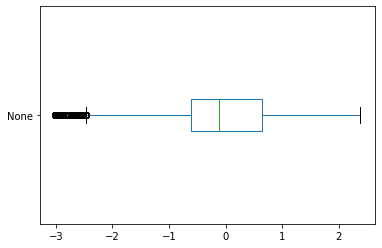

In [67]:
data_trans.plot(kind = 'box', vert = False)

In [68]:
#Splitting Data Back to Train and test

In [69]:
traindf = combineddatafinal[0:550068]

In [70]:
testdf = combineddatafinal[550068:]

In [71]:
X = traindf
y= data_trans

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
LinReg = LinearRegression()

In [79]:
LinRegmodel = LinReg.fit(X,y)

In [80]:
LinRegmodel.score(X,y)

0.17652569044694522

In [90]:
demodf = traindf

In [91]:
demodf['Purchase'] = data_trans

<ipython-input-91-2bb3b203e18b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demodf['Purchase'] = data_trans


In [92]:
demodf.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Purchase
0,1000001.0,10.0,0.0,3.0,9.0,0.0,684,0,0,0,2,-0.048832
1,1000001.0,10.0,0.0,1.0,6.0,14.0,2406,0,0,0,2,1.148825
2,1000001.0,10.0,0.0,12.0,9.0,0.0,868,0,0,0,2,-1.956054
3,1000001.0,10.0,0.0,12.0,14.0,0.0,844,0,0,0,2,-2.128608
4,1000002.0,16.0,0.0,8.0,9.0,0.0,2769,1,6,2,4,-0.130801


In [93]:
demodf.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001644,0.003605,-0.017815,-0.033474,0.032698,0.022859,-0.030737,0.003703
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.000557,0.012269,0.007447,0.117291,0.091463,0.034479,0.030005,0.019474
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.011526,-0.004629,0.011660,-0.011603,0.311738,0.039790,-0.012819,-0.000430
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.331691,-0.385534,0.074751,-0.045594,0.061197,-0.014364,-0.004213,-0.382710
Product_Category_2,0.001644,0.000557,0.011526,0.331691,1.000000,-0.273846,-0.001081,-0.014051,0.043503,-0.006888,-0.001087,-0.155386
Product_Category_3,0.003605,0.012269,-0.004629,-0.385534,-0.273846,1.000000,-0.138239,0.036146,-0.007422,0.035525,0.001977,0.278853
Product_ID,-0.017815,0.007447,0.011660,0.074751,-0.001081,-0.138239,1.000000,0.015948,0.023609,0.007065,-0.002397,-0.113965
Gender,-0.033474,0.117291,-0.011603,-0.045594,-0.014051,0.036146,0.015948,1.000000,-0.004262,-0.004515,0.014660,0.056585
Age,0.032698,0.091463,0.311738,0.061197,0.043503,-0.007422,0.023609,-0.004262,1.000000,0.123079,-0.004712,0.016249
City_Category,0.022859,0.034479,0.039790,-0.014364,-0.006888,0.035525,0.007065,-0.004515,0.123079,1.000000,0.019946,0.056941


In [87]:
from sklearn.preprocessing import RobustScaler

In [88]:
scale = RobustScaler()

In [94]:
demodftest = scale.fit_transform(demodf)

In [96]:
demodftest = pd.DataFrame(demodftest, columns = demodf.columns)

In [97]:
demodftest

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Purchase
0,-1.038488,0.250000,0.0,-0.285714,0.000000,0.00,-0.616891,-1.0,-2.0,-0.5,0.0,0.053110
1,-1.038488,0.250000,0.0,-0.571429,-0.500000,1.75,0.436965,-1.0,-2.0,-0.5,0.0,1.018553
2,-1.038488,0.250000,0.0,1.000000,0.000000,0.00,-0.504284,-1.0,-2.0,-0.5,0.0,-1.484320
3,-1.038488,0.250000,0.0,1.000000,0.833333,0.00,-0.518972,-1.0,-2.0,-0.5,0.0,-1.623418
4,-1.038150,0.750000,0.0,0.428571,0.000000,0.00,0.659119,0.0,4.0,0.5,1.0,-0.012966
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.997974,0.500000,1.0,2.142857,0.000000,0.00,1.175031,0.0,3.0,0.0,-0.5,-1.967497
550064,0.998650,-0.500000,0.0,2.142857,0.000000,0.00,1.175643,-1.0,0.0,0.5,0.5,-1.965547
550065,0.998987,0.666667,1.0,2.142857,0.000000,0.00,1.175643,-1.0,0.0,0.0,1.0,-2.149462
550066,0.999662,-0.500000,0.0,2.142857,0.000000,0.00,1.175643,-1.0,4.0,0.5,0.0,-1.969453


In [98]:
demodftest.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001644,0.003605,-0.017815,-0.033474,0.032698,0.022859,-0.030737,0.003703
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.000557,0.012269,0.007447,0.117291,0.091463,0.034479,0.030005,0.019474
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.011526,-0.004629,0.011660,-0.011603,0.311738,0.039790,-0.012819,-0.000430
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.331691,-0.385534,0.074751,-0.045594,0.061197,-0.014364,-0.004213,-0.382710
Product_Category_2,0.001644,0.000557,0.011526,0.331691,1.000000,-0.273846,-0.001081,-0.014051,0.043503,-0.006888,-0.001087,-0.155386
Product_Category_3,0.003605,0.012269,-0.004629,-0.385534,-0.273846,1.000000,-0.138239,0.036146,-0.007422,0.035525,0.001977,0.278853
Product_ID,-0.017815,0.007447,0.011660,0.074751,-0.001081,-0.138239,1.000000,0.015948,0.023609,0.007065,-0.002397,-0.113965
Gender,-0.033474,0.117291,-0.011603,-0.045594,-0.014051,0.036146,0.015948,1.000000,-0.004262,-0.004515,0.014660,0.056585
Age,0.032698,0.091463,0.311738,0.061197,0.043503,-0.007422,0.023609,-0.004262,1.000000,0.123079,-0.004712,0.016249
City_Category,0.022859,0.034479,0.039790,-0.014364,-0.006888,0.035525,0.007065,-0.004515,0.123079,1.000000,0.019946,0.056941


In [113]:
X = demodftest.drop(['Purchase','Stay_In_Current_City_Years','City_Category','Age','Gender','User_ID'],axis =1)

In [114]:
X.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID
0,0.25,0.0,-0.285714,0.000000,0.00,-0.616891
1,0.25,0.0,-0.571429,-0.500000,1.75,0.436965
2,0.25,0.0,1.000000,0.000000,0.00,-0.504284
3,0.25,0.0,1.000000,0.833333,0.00,-0.518972
4,0.75,0.0,0.428571,0.000000,0.00,0.659119


In [109]:
y = demodftest.Purchase

In [115]:
LinRegmodel = LinReg.fit(X,y)

In [116]:
LinRegmodel.score(X,y)

0.1718976068182102

In [117]:
X.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID
Occupation,1.000000,0.024280,-0.007618,0.000557,0.012269,0.007447
Marital_Status,0.024280,1.000000,0.019888,0.011526,-0.004629,0.011660
Product_Category_1,-0.007618,0.019888,1.000000,0.331691,-0.385534,0.074751
Product_Category_2,0.000557,0.011526,0.331691,1.000000,-0.273846,-0.001081
Product_Category_3,0.012269,-0.004629,-0.385534,-0.273846,1.000000,-0.138239
Product_ID,0.007447,0.011660,0.074751,-0.001081,-0.138239,1.000000


In [118]:
ypredict = LinRegmodel.predict(X)

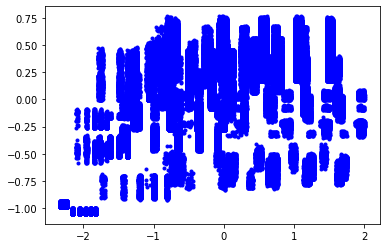

In [121]:
plt.plot(y, ypredict, 'b.')

In [122]:
train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [123]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [124]:
train.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [125]:
train.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [126]:
train.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00013842       1
P00068342       1
P00336242       1
P00022042       1
P00063442       1
Name: Product_ID, Length: 3631, dtype: int64

In [127]:
train.Product_Category_1.isnull().sum()

0

In [131]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [140]:
train.Product_ID.nunique()

528

In [141]:
traindf.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Purchase
0,1000001.0,10.0,0.0,3.0,9.0,0.0,684,0,0,0,2,-0.048832
1,1000001.0,10.0,0.0,1.0,6.0,14.0,2406,0,0,0,2,1.148825
2,1000001.0,10.0,0.0,12.0,9.0,0.0,868,0,0,0,2,-1.956054
3,1000001.0,10.0,0.0,12.0,14.0,0.0,844,0,0,0,2,-2.128608
4,1000002.0,16.0,0.0,8.0,9.0,0.0,2769,1,6,2,4,-0.130801


In [142]:
traindf.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001644,0.003605,-0.017815,-0.033474,0.032698,0.022859,-0.030737,0.003703
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.000557,0.012269,0.007447,0.117291,0.091463,0.034479,0.030005,0.019474
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.011526,-0.004629,0.011660,-0.011603,0.311738,0.039790,-0.012819,-0.000430
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.331691,-0.385534,0.074751,-0.045594,0.061197,-0.014364,-0.004213,-0.382710
Product_Category_2,0.001644,0.000557,0.011526,0.331691,1.000000,-0.273846,-0.001081,-0.014051,0.043503,-0.006888,-0.001087,-0.155386
Product_Category_3,0.003605,0.012269,-0.004629,-0.385534,-0.273846,1.000000,-0.138239,0.036146,-0.007422,0.035525,0.001977,0.278853
Product_ID,-0.017815,0.007447,0.011660,0.074751,-0.001081,-0.138239,1.000000,0.015948,0.023609,0.007065,-0.002397,-0.113965
Gender,-0.033474,0.117291,-0.011603,-0.045594,-0.014051,0.036146,0.015948,1.000000,-0.004262,-0.004515,0.014660,0.056585
Age,0.032698,0.091463,0.311738,0.061197,0.043503,-0.007422,0.023609,-0.004262,1.000000,0.123079,-0.004712,0.016249
City_Category,0.022859,0.034479,0.039790,-0.014364,-0.006888,0.035525,0.007065,-0.004515,0.123079,1.000000,0.019946,0.056941


In [143]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [147]:
train['User_ID'] = train['User_ID'] - 1000000
test['UserID'] = test['User_ID'] - 1000000

In [150]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,0,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [148]:
le = LabelEncoder()

In [156]:
train['Product_ID'] = train['Product_ID'].str.replace('P00', '')

In [179]:
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')

In [153]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [160]:
train['Product_ID'] = scale.fit_transform(train['Product_ID'].values.reshape(-1,1))

In [180]:
test['Product_ID'] = scale.fit_transform(test['Product_ID'].values.reshape(-1,1))

In [162]:
categorical_col = ['Gender', 'City_Category']
numerical_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [163]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,0.722139,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,-0.845799,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,0,-0.869157,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1,1.077382,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Converting Age Bins to Numbers 

In [164]:
train['Age']=train['Age'].replace('0-17',17)
train['Age']=train['Age'].replace('18-25',25)
train['Age']=train['Age'].replace('26-35',35)
train['Age']=train['Age'].replace('36-45',45)
train['Age']=train['Age'].replace('46-50',50)
train['Age']=train['Age'].replace('51-55',55)
train['Age']=train['Age'].replace('55+',60)

In [181]:
test['Age']=test['Age'].replace('0-17',17)
test['Age']=test['Age'].replace('18-25',25)
test['Age']=test['Age'].replace('26-35',35)
test['Age']=test['Age'].replace('36-45',45)
test['Age']=test['Age'].replace('46-50',50)
test['Age']=test['Age'].replace('51-55',55)
test['Age']=test['Age'].replace('55+',60)

In [166]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,F,17,10,A,2,0,3,NaN,NaN,8370
1,0,0.722139,F,17,10,A,2,0,1,6.0,14.0,15200
2,0,-0.845799,F,17,10,A,2,0,12,NaN,NaN,1422
3,0,-0.869157,F,17,10,A,2,0,12,14.0,NaN,1057
4,1,1.077382,M,60,16,C,4+,0,8,NaN,NaN,7969


In [167]:
#Stay_In_Current_City_Years
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [169]:
#Replacing 4+ with 4
train.Stay_In_Current_City_Years = train.Stay_In_Current_City_Years.replace('4+',4)

In [182]:
test.Stay_In_Current_City_Years = test.Stay_In_Current_City_Years.replace('4+',4)

In [171]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [177]:
train = train.fillna(0)

In [183]:
test = test.fillna(0)

In [185]:
#Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder

In [186]:
le = LabelEncoder()

In [190]:
for col in categorical_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [191]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,0,17,10,0,2,0,3,0.0,0.0,8370
1,0,0.722139,0,17,10,0,2,0,1,6.0,14.0,15200
2,0,-0.845799,0,17,10,0,2,0,12,0.0,0.0,1422
3,0,-0.869157,0,17,10,0,2,0,12,14.0,0.0,1057
4,1,1.077382,1,60,16,2,4,0,8,0.0,0.0,7969


In [192]:
#Scaling Numerical Columns 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [194]:
for col in numerical_col:
    train[col] = scale.fit_transform(train[col].values.reshape(-1,1))
    test[col] = scale.transform(test[col].values.reshape(-1,1))

In [195]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,0,-2.059570,0.294864,0,0.109801,0,-0.610809,-1.083654,-0.614641,8370
1,0,0.722139,0,-2.059570,0.294864,0,0.109801,0,-1.118912,-0.118323,1.625106,15200
2,0,-0.845799,0,-2.059570,0.294864,0,0.109801,0,1.675656,-1.083654,-0.614641,1422
3,0,-0.869157,0,-2.059570,0.294864,0,0.109801,0,1.675656,1.168785,-0.614641,1057
4,1,1.077382,1,2.094842,1.214734,2,1.660861,0,0.659449,-1.083654,-0.614641,7969


In [196]:
X = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]

In [198]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
lm_model=reg.fit(X,y)
pred=lm_model.predict(X)

In [199]:
lm_model.score(X,y)

0.15529311939030532

In [202]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y,pred))

4616.59156005525

In [208]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [209]:
xgb_reg.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=6,
             min_child_weight=40, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
y_pred = xgb_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y_pred, y))

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [211]:
y_pred

array([ 9811.124  , 17899.525  ,  1674.531  , ...,   185.10408,
        1060.264  ,  1781.2653 ], dtype=float32)

In [212]:
np.sqrt(mean_squared_error(y_pred, y))

2486.9832856693765

In [214]:
X = test
result = xgb_reg.predict(X)

In [215]:
result

array([ 9514.114 , 12508.33  ,  3540.9705, ..., 10643.008 , 18941.537 ,
        2152.7666], dtype=float32)

In [216]:
result = pd.Series(result)

In [217]:
result.to_csv('result.csv')